## Fitting drug response curves with sigmoid function

In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm
import warnings

import os, sys
sys.path.insert(1, os.path.relpath("../functions"))

from fitting import *
from plotting import *

warnings.filterwarnings("ignore")
_FOLDER = "../data/"
_FOLDER_2 = "../figures/"
_FOLDER_3 = "../results/"

## Fitting data

In [2]:
df = pd.read_csv(_FOLDER_3+"filt_123.csv")
conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]
df.columns

Index(['CELL_LINE_NAME', 'COSMIC_ID', 'DRUG_ID', 'DRUGID_COSMICID',
       'FOLD_DILUTION', 'MAX_CONC', 'fd_num_0', 'fd_num_1', 'fd_num_2',
       'fd_num_3', 'fd_num_4', 'fd_num_5', 'fd_num_6', 'fd_num_7', 'fd_num_8',
       'fd_num_9', 'norm_cells_0', 'norm_cells_1', 'norm_cells_2',
       'norm_cells_3', 'norm_cells_4', 'norm_cells_5', 'norm_cells_6',
       'norm_cells_7', 'norm_cells_8', 'norm_cells_9', 'drug_name', 'CCL_name',
       'dif_first', 'dif_last'],
      dtype='object')

### sigmoid_4_param

In [3]:
%%time
fitting_function = "sigmoid_4_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]>0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
print("Number of samples with fitting <0.1:", df[df[fitting_function+"_r2"]<0.1].shape[0])
print("")

100%|██████████| 2776/2776 [00:08<00:00, 340.49it/s]

<function sigmoid_4_param at 0x7f91002d5ae8>
R2>0: (2755, 32)
R2>0.9 2703
Number of samples with fitting <0.1: 21

CPU times: user 7.79 s, sys: 328 ms, total: 8.12 s
Wall time: 8.19 s


## Visual Analysis of fitting efficiency

### All samples

Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)


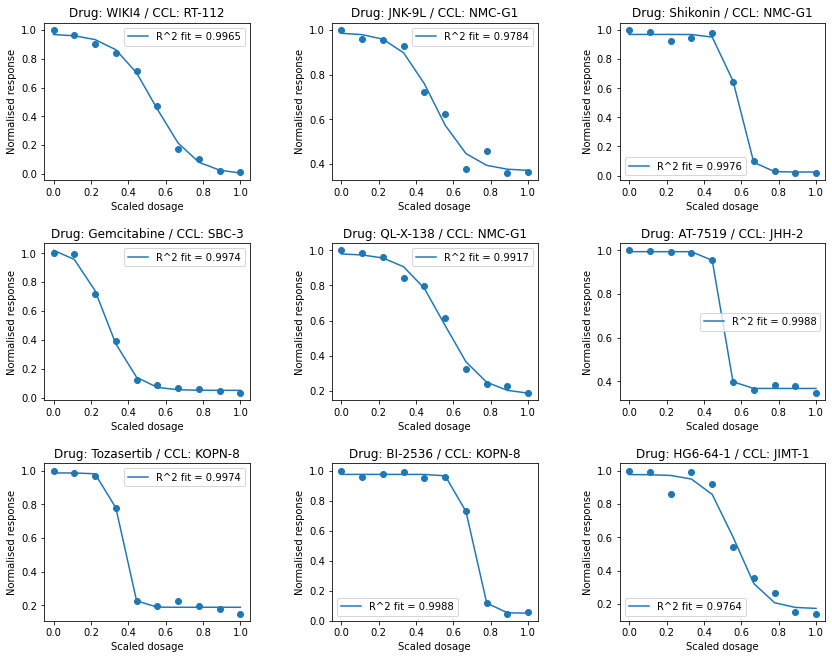

In [4]:
# ShowResponseCurvesWithFitting(df.drop(["drug_name", "CCL_name"],axis=1), plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
#                         indexes=df.index[:9],fitting_function = fitting_function, 
#                                   fitting_parameters =fitting_function)

show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### Bad fitting examples (examination after analysis of predictive models)

Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)


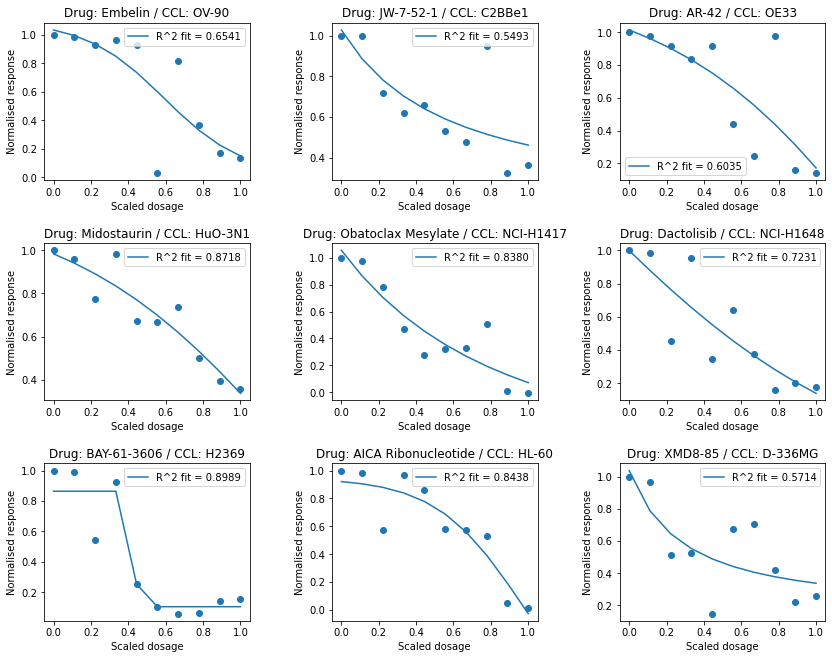

In [5]:
df2= df[(df[fitting_function+"_r2"]>0.1)& (df[fitting_function+"_r2"]<0.9)]

show_response_curves_with_fitting(df2, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes= df2.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### Outliers in predictive models

Fitting parameters: [  9.5763911   -5.03279099 -11.74360689   0.43769208]
Predicted parameters: [0.348604, 1.106316, -14.202945, 0.168828]


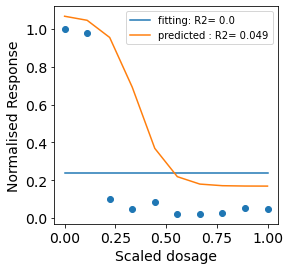

In [6]:
ind = int(df[(df["DRUG_ID"]==180)& (df["COSMIC_ID"]==907064)].index[0])
fitting_parameters = fitting_function
predicted_param = [0.348604, 1.106316, -14.202945, 0.168828]
save_fig_name = _FOLDER_2+"outlier_coef1_1.png"

show_one_fitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, predicted_param)

Fitting parameters: [ 1.2913904   0.4645758  -1.82168875 -0.81502011]
Predicted parameters: [0.623563, 1.099364, -13.124646, -8.77264e-15]


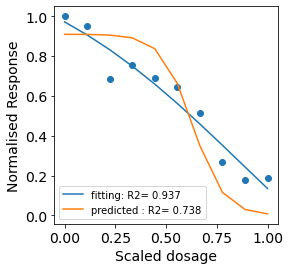

In [7]:
ind =int(df[(df["DRUG_ID"]==173)& (df["COSMIC_ID"]==687777)].index[0])
fitting_parameters =fitting_function
predicted_param = [0.623563, 1.099364, -13.124646, -8.772640e-15]
save_fig_name = _FOLDER_2+"outlier_coef3.png"

show_one_fitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, predicted_param)

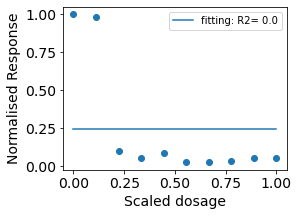

In [8]:
ind =int(df[(df["DRUG_ID"]==180)& (df["COSMIC_ID"]==907064)].index[0])
fitting_parameters =fitting_function
save_fig_name = _FOLDER_2+"outlier_coef1_2.png"

fig_size = (4,3)
show_one_fitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, fig_size=fig_size)

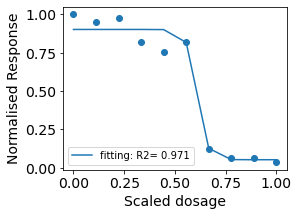

In [9]:
ind =int(df[(df["DRUG_ID"]==273)& (df["COSMIC_ID"]==907071)].index[0])
fitting_parameters =fitting_function
save_fig_name = _FOLDER_2+"filt_fit_0.png"

fig_size = (4,3)
show_one_fitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, fig_size=fig_size)

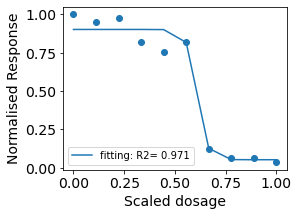

In [10]:
ind =int(df[(df["DRUG_ID"]==273)& (df["COSMIC_ID"]==907071)].index[0])
fitting_parameters = fitting_function
save_fig_name = _FOLDER_2+"filt_fit_0.png"

fig_size = (4,3)
show_one_fitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, fig_size=fig_size)

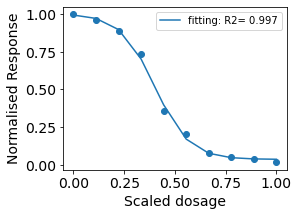

In [11]:
ind =int(df[(df["DRUG_ID"]==274)& (df["COSMIC_ID"]==1240223)].index[0])
save_fig_name = _FOLDER_2+"filt_fit_1.png"

fig_size = (4,3)
show_one_fitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, fig_size=fig_size)


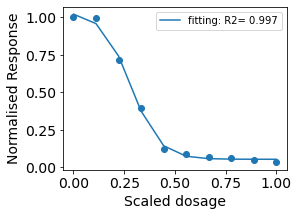

In [12]:
ind =int(df[(df["DRUG_ID"]==135)& (df["COSMIC_ID"]==753610)].index[0])
save_fig_name = _FOLDER_2+"filt_fit_2.png"

fig_size = (4,3)
show_one_fitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, fig_size=fig_size)

### sigmoid_2_param

100%|██████████| 2755/2755 [00:05<00:00, 539.10it/s]


<function sigmoid_2_param at 0x7f91002d5730>
R2>0: (2755, 34)
R2>0.9 2457
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 4.86 s, sys: 197 ms, total: 5.05 s
Wall time: 5.4 s


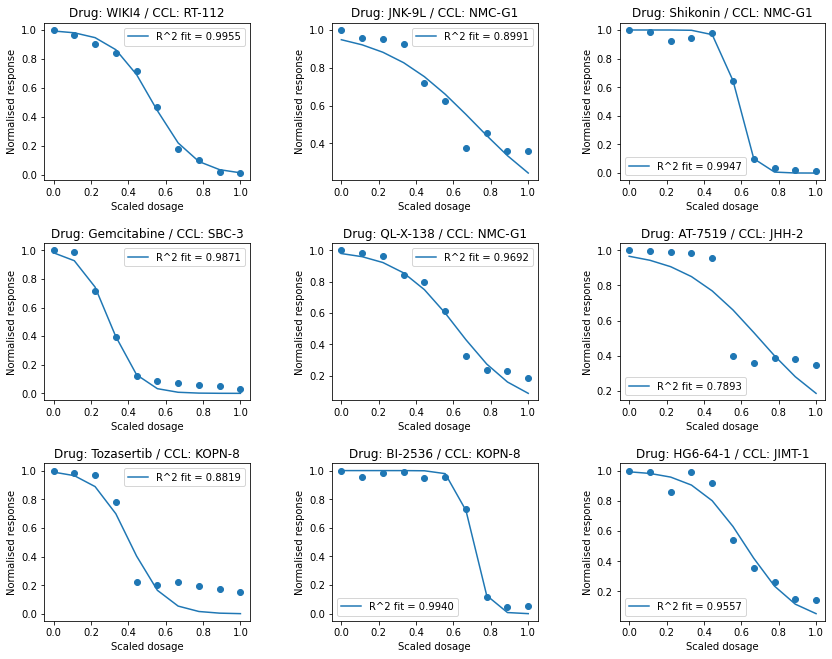

In [13]:
%%time
fitting_function = "sigmoid_2_param" 
# "sigmoid_Wang" we don't need default_param_number
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### sigmoid_3_param

In [ ]:
%%time
fitting_function = "sigmoid_3_param"

r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

 34%|███▍      | 942/2755 [00:03<00:05, 334.84it/s]

### fsigmoid

In [ ]:
# %%time
fitting_function = "fsigmoid"

r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print(df.shape)

show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logistic_4_param

In [ ]:
%%time
fitting_function = "logistic_4_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### LL4_4_param

In [ ]:
%%time
fitting_function = "ll4_4_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### ll4R_4_param

In [ ]:
%%time
fitting_function = "ll4R_4_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logLogist_3_param

In [ ]:
%%time
fitting_function = "logLogist_3_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

## Comparison of fitting models

In [ ]:
functions = {"fsigmoid", 
             "sigmoid_2_param",
             "sigmoid_3_param",
             "sigmoid_4_param",
             "logistic_4_param",
            "ll4_4_param",
            "ll4R_4_param",
            "logLogist_3_param"}

functions_dict= dict(list(enumerate(functions)))
r2_columns = [fitting_function+"_r2" for fitting_function in functions]

In [ ]:
df["better_fitting"] = np.argmax(df[r2_columns].values, axis=1)
r2_col_res = r2_columns +["better_fitting"]
df["better_fitting"] = df["better_fitting"].map(functions_dict)
df[r2_col_res].head()

In [ ]:
df["better_fitting"].value_counts()

In [ ]:
r2_limit = 0.98
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

In [ ]:
r2_limit = 0.95
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

In [ ]:
r2_limit = 0.9
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

In [ ]:
df.to_csv("results/fit_123.csv", index=False)